In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import os
import tensorflow as tf# 神经网络学习包
from sklearn.model_selection import train_test_split
import datetime
import pytz
import time

## 图像处理工具

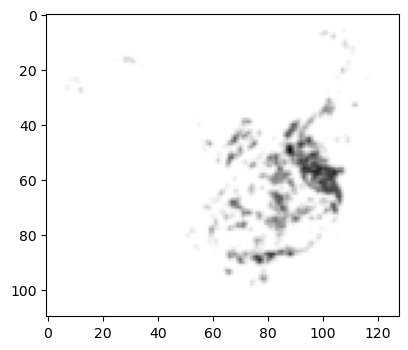

In [58]:
image = plt.imread('D:\\misic-temp-UTC_0\\202107\\6339.gif')
# image2 =  cv2.imread('D:\\radar_pull\\OpencvTest\\OpencvTest\\444.png')
# image3 = cv2.imread('D:\\radar_pull\\OpencvTest\\OpencvTest\\445.png')
# cv2.imshow("sadf",down_image(image))

# cv2.waitKey(0)
# cv2.destroyAllWindows()
# cv2.imwrite('D:\\misic-temp-UTC_0\\202107\\test.png', down_image(image))
fig = plt.figure(figsize=(10, 10), dpi=100)
plt.subplot(2, 2, 1)
plt.imshow(down_image(image),cmap='gray')

In [3]:
def generate_train_images(source_path,des_path,begin,end):
    
    for i in range(begin,end + 1):
        if(os.path.isfile(source_path + '\\{}.gif'.format(i))):
            image = down_image(plt.imread(source_path + '\\{}.gif'.format(i)))
            file_name = des_path + '\\train_image{}.png'.format(i)
            cv2.imwrite(file_name, image)
        else:
            pass

def down_image(image):
    image_result = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    return cv2.pyrDown(cv2.pyrDown(cv2.pyrDown(image_result)))

In [5]:
# plt.figure(figsize=(5, 5), dpi=150)
# plt.imshow(down_image(image3))
# image.shape
path_ = 'D:\\misic-temp-UTC_0\\202107'
def pack_images_to_des(path,begin,end):
    des_path = os.getcwd() + '\\train_images_{}_110_128'.format(path[-6:])
    if(not os.path.isdir(des_path)):
        os.mkdir(des_path)
    for f in (os.listdir(des_path)):#清空当前文件夹
        os.remove(des_path + '\\' + f)
    generate_train_images(path,des_path,begin,end)
pack_images_to_des(path_,1000,2000)

## 数据准备

In [6]:
data_path = os.getcwd() + '\\train_images_{}_110_128'.format(path_[-6:])
def load_data(path):
    """
    把指定文件夹的所有图片数据加载进训练数据集
    """
    data_collect_X = []
    data_collect_Y = [] 
    order_df = pd.DataFrame(os.listdir(path))
    number_image = order_df.apply(lambda x:int(x[0][11:-4]),axis = 1).sort_values().values.tolist()#文件名必须类似train_image123.png,取出所有文件数字名称用于顺序排名
    for i in range(len(number_image) - 6):
        image1 = cv2.imread(path + '\\' + 'train_image{}.png'.format(number_image[i]),cv2.IMREAD_GRAYSCALE)
        image2 =  cv2.imread(path + '\\' + 'train_image{}.png'.format(number_image[i+1]),cv2.IMREAD_GRAYSCALE)
        image3 = cv2.imread(path + '\\' + 'train_image{}.png'.format(number_image[i+2]),cv2.IMREAD_GRAYSCALE)
        image4 = cv2.imread(path + '\\' + 'train_image{}.png'.format(number_image[i+3]),cv2.IMREAD_GRAYSCALE)
        image5 = cv2.imread(path + '\\' + 'train_image{}.png'.format(number_image[i+4]),cv2.IMREAD_GRAYSCALE)
        image6 = cv2.imread(path + '\\' + 'train_image{}.png'.format(number_image[i+5]),cv2.IMREAD_GRAYSCALE)
        image7 = cv2.imread(path + '\\' + 'train_image{}.png'.format(number_image[i+6]),cv2.IMREAD_GRAYSCALE)
        X = np.stack([image1,image2,image3,image4,image5,image6],axis = 0)
#         Y = np.stack([image3,image4],axis = 0)
        data_collect_X.append(X)
        data_collect_Y.append(image7)
    return np.array(data_collect_X),np.array(data_collect_Y)
       
        
def time_series_load_data(path):
    """
    把指定文件夹的所有图片数据加载进训练数据集
    """
    data_collect = []
    order_df = pd.DataFrame(os.listdir(path))
    number_image = order_df.apply(lambda x:int(x[0][11:-4]),axis = 1).sort_values().values.tolist()#文件名必须类似train_image123.png,取出所有文件数字名称用于顺序排名
    for i in range(len(number_image)):
        image = cv2.imread(path + '\\' + 'train_image{}.png'.format(number_image[i]),cv2.IMREAD_GRAYSCALE)
        data_collect.append(image)
    return np.array(data_collect)

    
def get_image_filesname(path):
     df_ = pd.DataFrame(os.listdir(path))
     order = df_.apply(lambda x:int(x[0][11:-4]),axis = 1)
     df_ = df_.set_index(order).sort_index()
     file_names = df_.apply(lambda x: os.getcwd() + '\\train_images_202107_110_128\\' + x).values
     data_collect_X = []
     data_collect_Y = [] 
     for i in range(len(file_names) - 6):
        X = np.stack([file_names[i],file_names[i+1],file_names[i+2],file_names[i+3],file_names[i+4],file_names[i+5]],axis = 0)
        data_collect_X.append(X)
        data_collect_Y.append(file_names[i+6])
     return np.array(data_collect_X),np.array(data_collect_Y)
    

In [7]:
# all_X,all_Y = get_image_filesname( os.getcwd() + '\\train_images_202107_110_128')
# all_train_X,all_valid_X,all_train_Y,all_valid_Y = train_test_split(all_X, all_Y, test_size=0.2, random_state=13)

# # all_train_X[5]

# all_valid_X.shape

In [8]:
x,y = load_data(data_path)
xx = x.reshape(-1,6,110,128,1)
yy = y.reshape(-1,110,128,1)
xx = xx.astype('float32')/255
yy = yy.astype('float32')/255
train_X,valid_X,train_Y,valid_Y = train_test_split(xx, yy, test_size=0.2, random_state=13)
valid_X.shape

(199, 6, 110, 128, 1)

## 构建神经网络层

In [31]:
# class My_Custom_Generator(tf.keras.utils.Sequence) :
  
#   def __init__(self, image_filenames, labels_filenames, batch_size) :
#     self.image_filenames = image_filenames
#     self.labels_filenames = labels_filenames
#     self.batch_size = batch_size
    
    
#   def __len__(self) :
#     return len(self.image_filenames) // self.batch_size
  
    
#   def __get_file_to_images_X(self,file_names):
#     train_ = []
#     for i in range(len(file_names)):
#         image_list = []
#         for n in range(len(file_names[i])):
#             image_list.append(cv2.imread(file_names[i][n][0],cv2.IMREAD_GRAYSCALE))
#         data = np.stack(image_list,axis = 0)
#         train_.append(data)
#     return np.array(train_).reshape(self.batch_size,6,110,128,1)
   
#   def __get_file_to_images_Y(self,file_names):
#     train_ = []
#     for i in range(len(file_names)):
#         train_.append(cv2.imread(file_names[i][0],cv2.IMREAD_GRAYSCALE))
#     train_ = np.stack(train_,axis = 0)
#     return np.array(train_).reshape(self.batch_size,110,128,1)


#   def __getitem__(self, idx) :
#     batch_x = self.image_filenames[idx * self.batch_size : (idx+1) * self.batch_size]
#     batch_y = self.labels_filenames[idx * self.batch_size : (idx+1) * self.batch_size]
#     train_x = self.__get_file_to_images_X(batch_x)
#     train_y = self.__get_file_to_images_Y(batch_y)   
    
    
#     return train_x,train_y




def cons_model():
    
    model = tf.keras.models.Sequential()
    """
    参数说明
    kernel_size = 用于提取特征的2d矩阵的大小
    activation = 激发函数
    
    """
    model.add(tf.keras.layers.ConvLSTM2D(filters=64, kernel_size=(3, 3),
                         input_shape=(6,110, 128, 1), padding='same', return_sequences=True, 
                         activation='tanh', recurrent_activation='hard_sigmoid',
                         kernel_initializer='glorot_uniform', unit_forget_bias=True, 
                         dropout=0.3, recurrent_dropout=0.2, go_backwards=True )) ##添加卷积循环层，提取序列图像特征以及时次特征
    model.add(tf.keras.layers.BatchNormalization())##添加标准化层，用于标准化图像数据

    model.add(tf.keras.layers.ConvLSTM2D(filters=32, kernel_size=(3, 3), padding='same', return_sequences=True, 
                         activation='tanh', recurrent_activation='hard_sigmoid', 
                         kernel_initializer='glorot_uniform', unit_forget_bias=True, 
                         dropout=0.3, recurrent_dropout=0.2, go_backwards=True ))
    model.add(tf.keras.layers.BatchNormalization())
    
    model.add(tf.keras.layers.ConvLSTM2D(filters=32, kernel_size=(3, 3), padding='same', return_sequences=True, 
                         activation='tanh', recurrent_activation='hard_sigmoid', 
                         kernel_initializer='glorot_uniform', unit_forget_bias=True, 
                         dropout=0.3, recurrent_dropout=0.2, go_backwards=True ))
    model.add(tf.keras.layers.BatchNormalization())


    model.add(tf.keras.layers.ConvLSTM2D(filters=32, kernel_size=(3, 3), padding='same', return_sequences=False, 
                         activation='tanh', recurrent_activation='hard_sigmoid', 
                         kernel_initializer='glorot_uniform', unit_forget_bias=True, 
                         dropout=0.3, recurrent_dropout=0.2, go_backwards=True ))
    model.add(tf.keras.layers.BatchNormalization())
    
    model.add(tf.keras.layers.Conv2D(filters=1, kernel_size=(1, 1),
                   activation='sigmoid',padding='same', data_format='channels_last')) 
    
    print(model.summary())
    return model

my_model = cons_model()


def cons_model1():
    model = tf.keras.models.Sequential()
    model.add(tf.keras.layers.ConvLSTM2D(filters=64, kernel_size=(2, 2),
                         input_shape=(6,110, 128, 1), padding='same', return_sequences=True, 
                         activation='tanh', recurrent_activation='hard_sigmoid',
                         kernel_initializer='glorot_uniform', unit_forget_bias=True, 
                         dropout=0.4, recurrent_dropout=0.2, go_backwards=True ))
    model.add(tf.keras.layers.BatchNormalization())

    model.add(tf.keras.layers.ConvLSTM2D(filters=32, kernel_size=(2, 2), padding='same', return_sequences=True, 
                         activation='tanh', recurrent_activation='hard_sigmoid', 
                         kernel_initializer='glorot_uniform', unit_forget_bias=True, 
                         dropout=0.4, recurrent_dropout=0.2, go_backwards=True ))
    model.add(tf.keras.layers.BatchNormalization())
    
    model.add(tf.keras.layers.ConvLSTM2D(filters=32, kernel_size=(2, 2), padding='same', return_sequences=True, 
                         activation='tanh', recurrent_activation='hard_sigmoid', 
                         kernel_initializer='glorot_uniform', unit_forget_bias=True, 
                         dropout=0.4, recurrent_dropout=0.2, go_backwards=True ))
    model.add(tf.keras.layers.BatchNormalization())


    model.add(tf.keras.layers.ConvLSTM2D(filters=32, kernel_size=(2, 2), padding='same', return_sequences=True, 
                         activation='tanh', recurrent_activation='hard_sigmoid', 
                         kernel_initializer='glorot_uniform', unit_forget_bias=True, 
                         dropout=0.4, recurrent_dropout=0.2, go_backwards=True ))
    model.add(tf.keras.layers.BatchNormalization())
    
    model.add(tf.keras.layers.ConvLSTM2D(filters=16, kernel_size=(2, 2), padding='same', return_sequences=True, 
                         activation='tanh', recurrent_activation='hard_sigmoid', 
                         kernel_initializer='glorot_uniform', unit_forget_bias=True, 
                         dropout=0.4, recurrent_dropout=0.2, go_backwards=True ))
    model.add(tf.keras.layers.BatchNormalization())
    
    
    model.add(tf.keras.layers.Conv3D(filters=1, kernel_size=(1,1,1),
                   activation='sigmoid'
                   padding='same', data_format='channels_last')) 
    
    print(model.summary())
    return model


Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv_lst_m2d_14 (ConvLSTM2D) (None, 6, 110, 128, 64)   150016    
_________________________________________________________________
batch_normalization_14 (Batc (None, 6, 110, 128, 64)   256       
_________________________________________________________________
conv_lst_m2d_15 (ConvLSTM2D) (None, 6, 110, 128, 32)   110720    
_________________________________________________________________
batch_normalization_15 (Batc (None, 6, 110, 128, 32)   128       
_________________________________________________________________
conv_lst_m2d_16 (ConvLSTM2D) (None, 6, 110, 128, 32)   73856     
_________________________________________________________________
batch_normalization_16 (Batc (None, 6, 110, 128, 32)   128       
_________________________________________________________________
conv_lst_m2d_17 (ConvLSTM2D) (None, 110, 128, 32)     

In [32]:
batch_size = 12
# my_training_batch_generator = My_Custom_Generator(all_train_X, all_train_Y, batch_size)
# my_validation_batch_generator = My_Custom_Generator(all_valid_X, all_valid_Y, batch_size)

In [33]:
my_model.compile(loss=tf.keras.losses.MeanSquaredError(), optimizer=tf.keras.optimizers.Adam(learning_rate = 0.002),metrics=['mean_squared_error'])

### model训练

In [ ]:
# my_train = my_model.fit(my_training_batch_generator, validation_data = my_validation_batch_generator,epochs=2,verbose=1)
# my_train = my_model.fit(train_X, train_Y, batch_size=batch_size,epochs=4,verbose=1,validation_data=(valid_X, valid_Y))

In [62]:
##储存模型到根目录
a_path = os.getcwd() + '\\' + str(datetime.date.today()) + '_model'
if(not os.path.isdir(a_path)):
    os.mkdir(os.getcwd() + '\\' + str(datetime.date.today()) + '_model')
my_model.save(os.getcwd() + '\\'+ str(datetime.date.today()) + '_model')

INFO:tensorflow:Assets written to: C:\Users\Administrator\Desktop\data_analyze\2021-08-05_model\assets


In [ ]:
# path_ = 'D:\\misic-temp-UTC_0\\202106'
# data_path = os.getcwd() + '\\train_images_{}_110_128'.format(path_[-6:])
# pack_images_to_des(path_,1,1500)
# x,y = load_data(data_path)
# xx = x.reshape(-1,6,110,128,1)
# yy = y.reshape(-1,110,128,1)
# xx = xx.astype('float32')/255
# yy = yy.astype('float32')/255
# train_X,valid_X,train_Y,valid_Y = train_test_split(xx, yy, test_size=0.2, random_state=13)
# my_train = my_model.fit(train_X, train_Y, batch_size=batch_size,epochs=4,verbose=1,validation_data=(valid_X, valid_Y))

### model1 训练

In [1]:
# train_range = [(1,2000),(2001,4000),(4001,6000)]
# for i in range(len(train_range)):
#     pack_images_to_des(path_,train_range[i][0],train_range[i][1])
#     x,y = load_data(data_path)
#     xx = x.reshape(-1,6,110,128,1)
#     yy = y.reshape(-1,110,128,1)
#     xx = xx.astype('float32')/255
#     yy = yy.astype('float32')/255
#     train_X,valid_X,train_Y,valid_Y = train_test_split(xx, yy, test_size=0.2, random_state=13)
#     my_train = my_model.fit(train_X, train_Y, batch_size=12,epochs=4,verbose=1,validation_data=(valid_X, valid_Y))
#     a_path = os.getcwd() + '\\' + str(train_range[i][0]) + '_' + str(train_range[i][1]) + str(datetime.date.today()) + '_model'
#     if(not os.path.isdir(a_path)):
#         os.mkdir(a_path)
#     my_model.save(a_path)

## 预测

In [10]:
predicted_classes = my_model.predict(train_X[:10])
predicted_classes.shape

(10, 110, 128, 1)

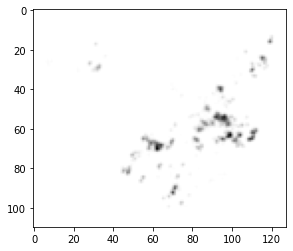

C:\Users\Administrator\Desktop\data_analyze


In [45]:
# fig = plt.figure(figsize=(10, 10), dpi=100)
# num = 2
# plt.subplot(2, 2, 1)
# plt.imshow(predicted_classes[num],cmap='gray')
# plt.subplot(2, 2, 2)
plt.imshow(train_Y[num],cmap='gray')
plt.show()

def f(image_ele):
    if image_ele > 230:
        return 255
    else:
        length = image_ele//10
        image_ele =image_ele//length * length
        return image_ele
# print(predicted_classes[num]*255)
a = np.vectorize(f)(predicted_classes[num]*255)
# print(a)
# cv2.imshow('a',cv2.cvtColor(a,cv2.COLOR_GRAY2RGB))

# cv2.waitKey(0)
# cv2.destroyAllWindows()

cv2.imwrite(os.getcwd() + '\\testaaa.png', a)

print(os.getcwd())

In [22]:
cv2.waitKey(0)
cv2.destroyAllWindows()

In [18]:
num = 10
count = 0
for i in range(50): 
    y_true = predicted_classes[i]
    y_pred = train_Y[i]
    # Using 'auto'/'sum_over_batch_size' reduction type.
    msle = tf.keras.losses.MeanSquaredError( )
    count += msle(y_true, y_pred).numpy()
count/50

0.04103856362402439

In [60]:
# y_true = [1, 2]
# y_pred = [[0.05, 0.95, 0], [0.1, 0.8, 0.1]]
# # Using 'auto'/'sum_over_batch_size' reduction type.
# scce = tf.keras.losses.SparseCategoricalCrossentropy()
# scce(y_true, y_pred).numpy()


## 运行

In [9]:
# test_eval = my_model.evaluate(test_X, test_Y)

a_path_to_model = os.getcwd()+ '\\' + '2001_40002021-08-06_model'#在_前加上model所在文件夹的名字
my_model = tf.keras.models.load_model(a_path_to_model)  #加载模型

In [47]:
path_ = 'D:\\misic-temp-UTC_0'
def run_predict(my_model,path,images_num):
    def sort_files(f_df):
        order = f_df.apply(lambda x:int(x[0][:-4]),axis = 1)
        return_df = f_df.set_index(order).sort_index()
        return f_df
    last_num_files = -1 #用于确认是否有新的图片加进来
    while(True):
        working_images = []
        yy_mm = str(datetime.datetime.now(pytz.utc).date()).replace("-","")[:-2]
        sources_path = path + '\\' + yy_mm
        to_path = path + '\\' + yy_mm + '_predict'
        if(len(os.listdir(path)) != last_num_files):#如果没有新图片加入
            last_num_files = len(os.listdir(path))
            if(not os.path.isdir(to_path)):
                os.mkdir(to_path)
            files_df = pd.DataFrame(os.listdir(sources_path))
            files_df = sort_files(files_df)
            if(len(files_df) < images_num):##当前月份还未出现足够的图片，去上一个月的文件夹里加载部分图片
                last_yy_mm = str(datetime.datetime.now(pytz.utc).date() - datetime.timedelta(days = 5)).replace("-","")[:-2]
                last_sources_path =  path + '\\' + last_yy_mm
                last_files_df = pd.DataFrame(os.listdir(last_sources_path))
                last_files_df = sort_files(last_files_df)
                images_num_from_last = images_num-len(files_df)
                for i in range(image_num_from_last):
                    im = plt.imread( last_sources_path+ '\\' + last_files_df.iloc[-i-1][0])
                    im = down_image(im)
                    working_images.append(im.reshape(110,128,1))
                working_images.reverse()
                for i in range(len(files_df)):
                    im = plt.imread(sources_path + '\\' + files_df.iloc[i][0])
                    im = down_image(im)
                    working_images.append(im.reshape(110,128,1))
            else:
                for i in range(images_num):
                    im = plt.imread(sources_path + '\\'+ files_df.iloc[-i-1][0])
                    im = down_image(im)
                    working_images.append(im.reshape(110,128,1))
                working_images.reverse()
            working_images = list(np.array(working_images)/255.0)
            name =  files_df.iloc[-1][0][:-4]
            for i in range(len(working_images)):#循环预测
                working_data = []
                working_image_stack = np.stack(working_images,axis = 0).reshape(images_num,110,128,1)
                working_data.append(working_image_stack)
                working_data = np.array(working_data)
                next_image = my_model.predict(working_data)
                iimage = (next_image[0]*255).astype(np.uint8)
                cv2.imwrite(to_path + '\\' + name +'+{}.png'.format(i+1), iimage)
                working_images.pop(0)
                working_images.append(next_image[0])

        else:
            pass
        time.sleep(60)

In [48]:
run_predict(my_model,path_, 6)

KeyboardInterrupt: 

## 安装核心packge

In [ ]:
# pip install -U numpy --user
# pip install numpy==1.19.5

In [ ]:
# pip install opencv-python==4.2.0.32 --user

In [ ]:
# pip install numpy==1.19.5 --user

In [82]:
a = list(np.array([1,2,3])/1.0)
a

[1.0, 2.0, 3.0]

a1a2
